<hr style="height:2px;border-width:0;background-color:violet">
<hr style="height:2px;border-width:0;background-color:violet">
<center> 
    <h1><b>Tarea 8: KNN models</b></h1> 
    <h3> Introducción a Ciencia de Datos</h3>
    <h5><a href="https://github.com/PhysTony/ICD_CIDE" target="_blank" style="text-align:justify; color:blue">Antonio Huerta Montellano</a></h5>
</center>
<hr style="height:2px;border-width:0;background-color:violet">
<hr style="height:2px;border-width:0;background-color:violet">
<br>

<ol type="I"> 
    <li> A partir de la base de datos <em>breast_cancer</em> disponible en sklearn obtén los accuracy scores con kNN para valores de k entre 1 y 10, usando tanto al training set como al testing set  como observaciones a evaluar  (puntos en cuestión).
</ol>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

print("Modulos importados")

Modulos importados


In [3]:
# Carguemos el dataset
df_cancer = load_breast_cancer()

In [4]:
# Para modificar el tamaño de todos los gráficos.
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,9

Veamos algunas de las características de la data

In [5]:
# Las características que están disponibles del dataframe
df_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Ya vimos algunas características generales, pero ahora veamos cuáles de estas son las variables objetivo que se pueden usar para el algorítmo de *KNN*:

In [6]:
df_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Creemos el conjunto de entrenamiento y de prueba para los algorítmos

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df_cancer.data,
                                                    df_cancer.target,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

Como ya conocemos la cantidad de *accuracy scores* que debemos hallar, podemos crear dos *array* de tamañao fijo que alamacene dichos valores. En este caso, serán de tamaño $10\times 2$ debido a que son 10 *scores* los que necesitamos y dos comparaciones.

In [8]:
accuracy_scores_train = np.ones((10))
accuracy_scores_test = np.ones((10))

In [9]:
accuracy_scores_train[0] = 2
accuracy_scores_test[1] = 3

In [10]:
accuracy_scores_test

array([1., 3., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
for i in range(10):
    knn = KNeighborsClassifier(n_neighbors = i + 1,
                               metric = 'minkowski',
                               weights = 'uniform')
    
    knn.fit(X_train, Y_train)
    
    accuracy_scores_train[i] = knn.score(X_train, Y_train)
    accuracy_scores_test[i] = knn.score(X_test, Y_test)
    
    # También se puede hacer con el módulo "metrics" de sklearn y usar el siguiente código:
    # print("Accuracy:", metrics.accuracy_score(Y_test, calculated_labels))

<ol type="I"> 
    <li>Almacena a estos valores en dos listas diferentes y haz es un mismo plot las gráficas de los valores de k -en el eje horizontal- contra las listas con los accuracy scores (training  y  testing) correspondientes. No se te olvide poner las etiquetas en los ejes y una leyenda para distinguir a  cada tipo de score.
</ol>
Veamos los <em>accuracy scores</em> donde se empieza desde $k=1$.

In [12]:
print(accuracy_scores_train)
print(accuracy_scores_test)

[1.         0.96263736 0.96043956 0.95164835 0.94945055 0.93846154
 0.93406593 0.93846154 0.93626374 0.93626374]
[0.9122807  0.89473684 0.9122807  0.92105263 0.93859649 0.93859649
 0.94736842 0.94736842 0.96491228 0.94736842]


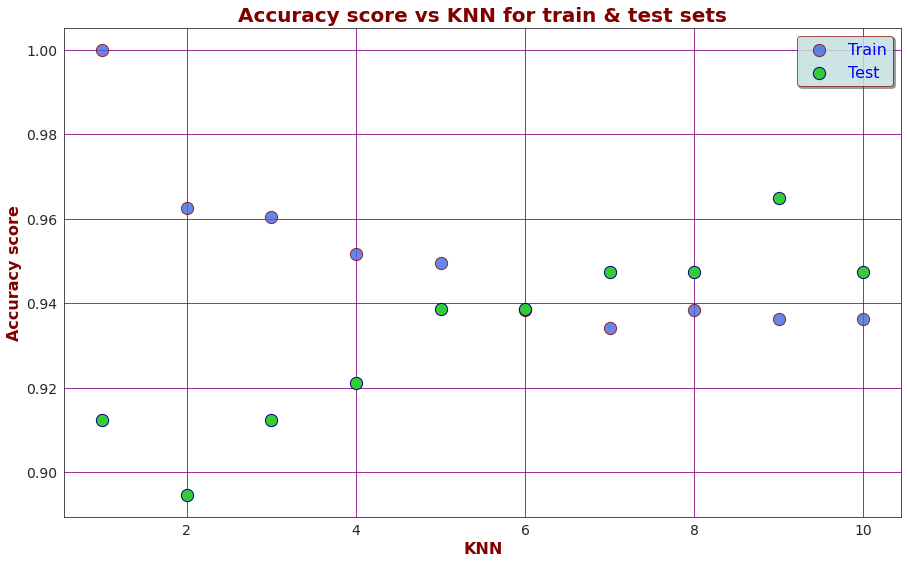

In [44]:
sns.set_style('white')
sns.regplot(x = np.arange(1,11), y = accuracy_scores_train,
            fit_reg = False, label="Train",
            scatter_kws={"color": 'royalblue', 'edgecolor':'darkred', "s":150, "alpha":0.8},
            line_kws={"color": "#8e00ce"})
sns.regplot(x = np.arange(1,11), y = accuracy_scores_test, 
            fit_reg = False, label="Test",
            scatter_kws={"color": 'limegreen', 'edgecolor':'navy', "s":150, "alpha":0.99},
            line_kws={"color": "#8e00ce"})
plt.title("Accuracy score vs KNN for train & test sets", 
          fontsize = 20, fontweight = 'bold',
          color = 'maroon')
plt.xlabel("KNN", fontsize = 16, fontweight = 'bold',
          color = 'maroon')
plt.ylabel("Accuracy score", fontsize = 16, fontweight = 'bold',
          color = 'maroon')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 'best', fontsize=16, 
           labelcolor = 'blue', facecolor = 'lightcyan',
           edgecolor = 'maroon', framealpha = 0.7,
           fancybox = True, shadow = True)
plt.grid(color='purple', linestyle='-')
plt.show()

<ol type="I"> 
    <li> Como interpretas el resultado que observas en estas dos gráficas
</ol>

Vemos que salvo el primer punto, en general, entre más centros escojamos para el algorítmo, el conjunto de entrenamiento tiene una menor precisión y viceversa para el conjunto de prueba. Sin embargo, vemos que esto es cierto hasta cierto punto, por ejemplo, en el caso del conjunto de prueba, vemos pequeñas oscilaciones en esta tendencia en su pendiente, pero observamos dos cambios bruscos en $K=2$ y $k=9$; análogamente para el conjunto de entrenamoiento para $k=7$. Por otro lado, vemos que obtiene el mismo valor para $k=6$. Es obvio que como cuando se considera solo un vecino en elconjunto de entrenamiento, este abarcará todas los valore reales; mientras que por la poca flexibilidad, se espera una precisión menor en el conjunto de prueba.

En general, vemos que entre más vecinos consideremos, mejor es el desempeño en el conjunto de prueba y peor en el de entrenamiento.